## Introduction To Dataset:-

The dataset contains information of personal finance questions discussed on forums by people.

**There are 1,38,792 observations and 9 columns**

**1.post_id** - Id assigned to a particular post.

**2.post_date**- Date on which the post was posted on the forum.

**3.post_title** - Title of the post.

**4.post_author** - Username of the user asked the question.

**5.post_text** - The text explaining the question.

**6.reply_date** - Date on which the reply was posted.

**7.repiler** - Username of replier.

**8.reply_text** - Text containing the answers to the posted questions.

**9.replier_posts_counts** - Total number of posts made by the replier.

## Importing Necessary Libraries:-

In [ ]:
#For analysis
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

## Data Cleaning:-

In [ ]:
# Reading the file
df=pd.read_csv("/content/bogleheads_all_data_personal_finance (1).csv")

In [ ]:
# Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138793 entries, 0 to 138792
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   post_id              138793 non-null  int64  
 1   post_date            138793 non-null  object 
 2   post_title           138793 non-null  object 
 3   post_author          138323 non-null  object 
 4   post_text            138175 non-null  object 
 5   reply_date           138793 non-null  object 
 6   replier              137432 non-null  object 
 7   reply_text           138399 non-null  object 
 8   replier_posts_count  138788 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 9.5+ MB


In [ ]:
# Finding sum of null values
df.isnull().sum()

post_id                   0
post_date                 0
post_title                0
post_author             470
post_text               618
reply_date                0
replier                1361
reply_text              394
replier_posts_count       5
dtype: int64

In [ ]:
# Dealing with null values

df= df.dropna(how='any', axis=0, subset = ['reply_text','post_text','replier_posts_count'])

In [ ]:
df['replier']=df['replier'].fillna('Guest')
df['post_author']=df['post_author'].fillna('Anonymous')

In [ ]:
# Finding Duplicates
df.duplicated().sum()

272

In [ ]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Finding and expanding contractions

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","i'm":"i am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [ ]:
# Expanding Contractions in the post and replies
df['post_title']=df['post_title'].apply(lambda x:expand_contractions(x))
df['post_text']=df['post_text'].apply(lambda x:expand_contractions(x))
df['reply_text']=df['reply_text'].apply(lambda x:expand_contractions(x))

In [ ]:
#In NLP, models treat uppercase and lowercase words differently, even if they are the same. 
#Therefore, to overcome this problem, we lowercase the words. 
df['post_title']=df['post_title'].apply(lambda x: x.lower())
df['post_text']=df['post_text'].apply(lambda x: x.lower())
df['reply_text']=df['reply_text'].apply(lambda x: x.lower())

In [ ]:
# Removing digits and words containing digits
df["post_text"] = df['post_text'].apply(lambda x: re.sub('\w*\d\w*','', x))
df["post_title"] = df['post_title'].apply(lambda x: re.sub('\w*\d\w*','', x))
df["reply_text"] = df['reply_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
# Removing Punctuations
df['post_title']=df['post_title'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df['post_text']=df['post_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df['reply_text']=df['reply_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
# Removing extra spaces
df['post_title']=df['post_title'].apply(lambda x: re.sub(' +',' ',x))
df['post_text']=df['post_text'].apply(lambda x: re.sub(' +',' ',x))
df['reply_text']=df['reply_text'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Lemmatization with stopwords removal
df['lemmatized-post_title']=df['post_title'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df['lemmatized-post_text']=df['post_text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df['lemmatized_reply_text']=df['reply_text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
#add length of text as a feature
df['len_reply_text']=df['lemmatized_reply_text'].str.split().str.len()
df['len_post_text']=df['lemmatized-post_text'].str.split().str.len()

In [ ]:
# Average length of questions
avg = int(np.mean(df["len_post_text"]))
print(f"Average length of questions: {avg}")

Average length of questions: 83


In [ ]:
# Average length of replies
avg = int(np.mean(df["len_reply_text"]))
print(f"Average length of replies: {avg}")

Average length of replies: 33


In [ ]:
df = df.drop(['post_title','post_text', 'reply_text','post_author','replier','post_id','post_date','reply_date','replier_posts_count'], axis=1)

In [ ]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.6 MB/s eta 0:00:00


In [ ]:
from textstat import flesch_reading_ease

def plot_text_complexity_histogram(text):
    text.apply(lambda x : flesch_reading_ease(x)).hist()

In [ ]:
# add complexity as a feature 
df['complex_reply_text']=df['lemmatized_reply_text'].apply(lambda x : flesch_reading_ease(x))
df['complex_post_text']=df['lemmatized-post_text'].apply(lambda x : flesch_reading_ease(x))

In [ ]:
df.to_csv('cleaned_personal_finance_forum.csv') 


## Let's start EDA:-

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2")
def create_wordcloud(df, column_name):
    text = ' '.join(df[column_name].astype(str))
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

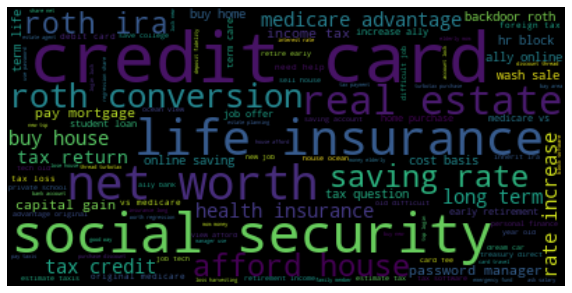

In [ ]:
# Frequently appeared words in Title of the Post
plt.figure(figsize=(10,8))
create_wordcloud(df,'lemmatized-post_title')

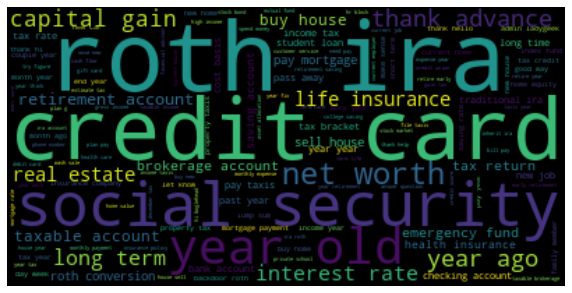

In [ ]:
#Frequently appeared words in the Questions
plt.figure(figsize=(10,8))
create_wordcloud(df, 'lemmatized-post_text')

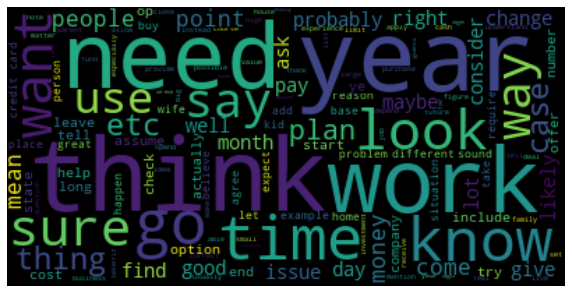

In [ ]:
#Frequently appeared words in the Replies
plt.figure(figsize=(10,8))
create_wordcloud(df, 'lemmatized_reply_text')

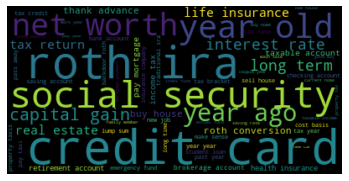

In [ ]:
# Are they of any use for our project
# Concatenate the "questions" and "answers" columns into a single text
text = df['lemmatized-post_title'].str.cat(df['lemmatized-post_text'], sep=' ').str.cat(df['lemmatized_reply_text'], sep=' ')

# Create the word cloud
wordcloud = WordCloud().generate(' '.join(text.to_list()))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Exploring through text complexity

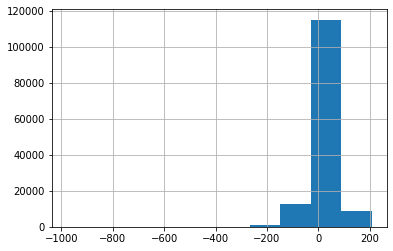

In [ ]:
plot_text_complexity_histogram(df['lemmatized_reply_text'])

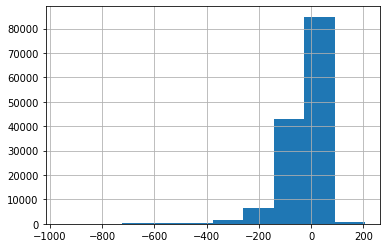

In [ ]:
plot_text_complexity_histogram(df['lemmatized-post_text'])

Complexity of reply text is lower than the post text.

## Named Entity recognition

In [ ]:
df1=pd.read_csv("/content/cleaned_personal_finance_forum.csv")

In [ ]:
from collections import Counter
import seaborn as sns

In [ ]:
def plot_named_entity_barchart(text,title):    
    def _get_ner(text):
        nlp = spacy.load("en_core_web_sm")
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x).set(title=title)

In [ ]:
plot_named_entity_barchart(df1['lemmatized_reply_text'],'ner_reply_text')

ValueError: ignored

In [ ]:
plot_named_entity_barchart(df1['lemmatized-post_text'],'ner_post_text')

In [ ]:
plot_named_entity_barchart(df1['lemmatized-post_title'],'ner_post_title')

In [ ]:
def plot_most_common_named_entity_barchart(text, entity="PERSON"):

    def _get_ner1(text,ent):
        nlp = spacy.load("en_core_web_sm")
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner1(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(y,x).set_title(entity)

In [ ]:
plot_most_common_named_entity_barchart(df1['lemmatized-post_title'], entity="PERSON")

In [ ]:
plot_most_common_named_entity_barchart(df1['lemmatized-post_text'], entity="PERSON")

In [ ]:
plot_most_common_named_entity_barchart(df1['lemmatized-reply_text'], entity="PERSON")

## Topic Modelling

In [ ]:
!pip install pyLDAvis==2.1.2

In [ ]:
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dic)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')

*   On the left side, the area of each circle represents the importance of the 
topic relative to the corpus. As there are four topics, we have four circles.
*   The distance between the center of the circles indicates the similarity between the topics. Here you can see that the topic 3 and topic 4 overlap, this indicates that the topics are more similar.
*   On the right side, the histogram of each topic shows the top 30 relevant words. For example, in topic 1 the most relevant words are police, new, may, war, etc

In [ ]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
lda_model, bow_corpus, dic = get_lda_objects(df1['lemmatized_reply_text'])

In [ ]:
lda_model.show_topics()

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
pyLDAvis.display(vis)

## Exploration through parts of speech

There are eight main parts of speech:


*   Noun (NN)- kevin, USA, book, cat, teacher, pen, city
*   Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is

*   Adjective(JJ)- beautiful, happy, sad, young, fun, three
*   Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow

*   Preposition (IN)- at, on, in, from, with, near, between, about, under

*   Conjunction (CC)- and, or, but, because, so, yet, unless, since, if
*   Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this

*  Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!

In [ ]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=df1['lemmatized-post_text'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

In [ ]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=df1['lemmatized_reply_text'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)

## N gram Exploration

In [ ]:
from nltk.util import ngrams


In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [ ]:
top_n_bigrams=get_top_ngram(df1['lemmatized-post_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

In [ ]:
top_tri_grams=get_top_ngram(df1['lemmatized_reply_text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)